## Importing Required Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

## Declaring **Population Change Differential Equation** & **Random Walk Method** for variation in factors

In [2]:
def random_walk(coefficients, delta_coefficients):
    return coefficients + delta_coefficients

def population_model(P, t, r, K, a, b, delta_a, delta_b):
    # Update coefficients using random walks
    index = int(t)  # Convert t to an integer index
    a = random_walk(a, delta_a[:, index])
    b = random_walk(b, delta_b[:, index])

    # Calculate population change
    dPdt = r * P * (1 - P / K) + np.sum(a * P - b * P)
    return dPdt

## Declaring Calculation Parameters

In [3]:
# Parameters
r = 0.1   # Intrinsic growth rate
K = 10000  # Carrying capacity

# Initial coefficients
a_init = np.array([0.1, 0.2, 0.05, 0.1, 0.15])
b_init = np.array([0.08, 0.1, 0.12, 0.18, 0.2])

# Initial population
P0 = 1000

# Time values
t = np.linspace(0, 100, 10000)

## Declaring Randomness value for "Random Walk" Method

In [4]:
# Random increments for coefficients
delta_a = np.random.normal(0, 0.002, size=(len(a_init), len(t)))
delta_b = np.random.normal(0, 0.002, size=(len(b_init), len(t)))

# Solve the differential equation
solution = odeint(population_model, P0, t, args=(r, K, a_init, b_init, delta_a, delta_b))

## Plotting Results

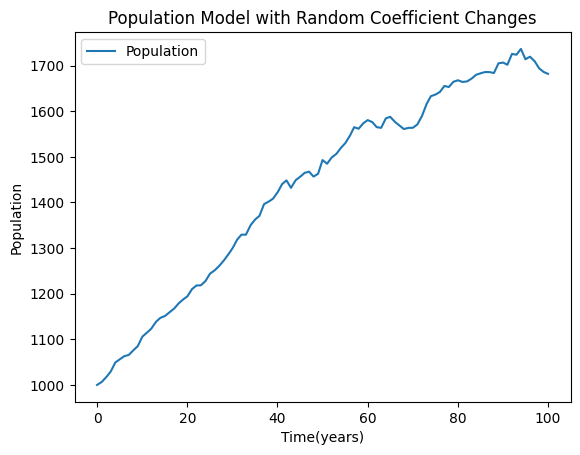

In [6]:
# Plotting the population over time
plt.plot(t, solution, label='Population')
plt.xlabel('Time(years)')
plt.ylabel('Population')
plt.title('Population Model with Random Coefficient Changes')
plt.legend()
plt.show()